In [ ]:
IMPORT STATEMENTS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DATA READING AND ANALYSIS

In [ ]:
data = pd.read_csv("dataset/Admission_Predict.csv")


In [ ]:
data.drop(["Serial No."], axis=1, inplace=True)


In [ ]:
data.head()


In [ ]:
GRE Score	TOEFL Score	University Rating	SOP	LOR	CGPA	Research	Chance of Admit
     337	    118	              4	      4.5	4.5	9.65	    1	         0.92
	   324	    107	              4	      4.0	4.5	8.87    	1	         0.76
	   316	    104	              3	      3.0	3.5	8.00	    1        	0.72
	   322	    110	              3	      3.5	2.5	8.67	    1       	0.80
	   314	    103	              2	      2.0	3.0	8.21	    0	        0.65


In [ ]:
data.describe()


In [ ]:
      GRE Score	  TOEFL Score	University Rating  	 SOP	            LOR	       CGPA  	    Research  	Chance of Admit
count	400.000000	400.000000	    400.000000	    400.000000	400.000000	400.000000	400.000000	    400.000000
mean	316.807500	107.410000	     3.087500	       3.400000	   3.452500	    8.598925	  0.547500	     0.724350
std  	11.473646	   6.069514	      1.143728	     1.006869	    0.898478	   0.596317	   0.498362	      0.142609
min	290.000000	   92.000000	    1.000000	     1.000000	    1.000000	   6.800000	    0.000000	    0.340000
25%	308.000000	  103.000000	    2.000000	     2.500000	     3.000000	   8.170000	   0.000000	      0.640000
50%	317.000000	  107.000000	    3.000000	     3.500000	     3.500000	   8.610000	   1.000000	      0.730000
75%	325.000000  	112.000000     	4.000000	     4.000000	     4.000000	   9.062500	   1.000000	      0.830000
max	340.000000	  120.000000	    5.000000	     5.000000	     5.000000	   9.920000	   1.000000      	0.970000

In [ ]:
data.info()


In [ ]:
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB

In [ ]:
data.isnull().sum() 

In [ ]:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


VISUALIZATION

In [ ]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

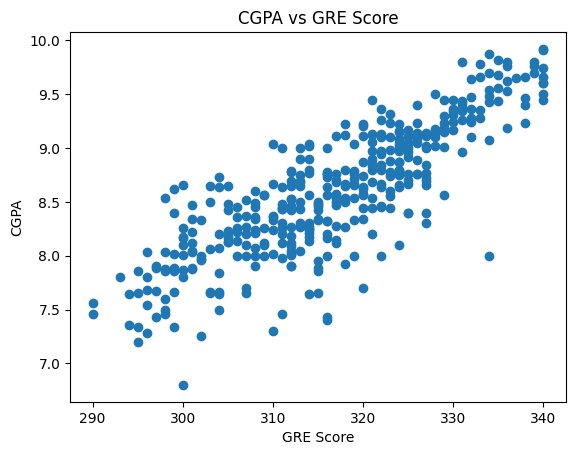

In [ ]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

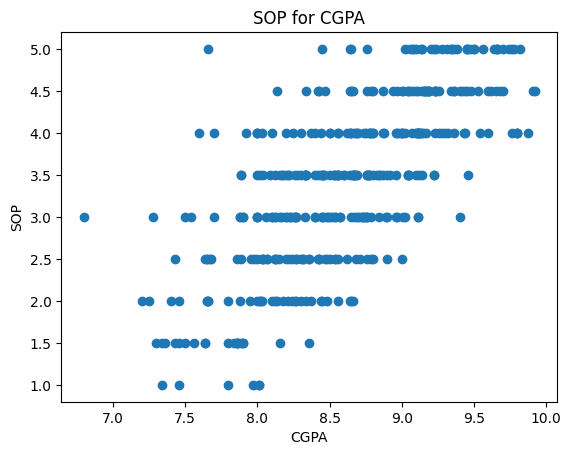

In [ ]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()


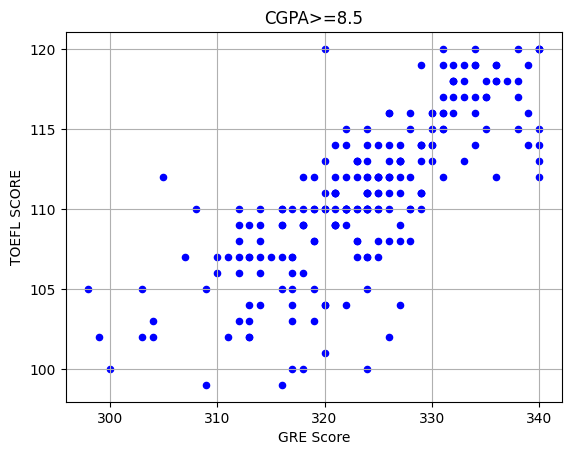

In [ ]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()


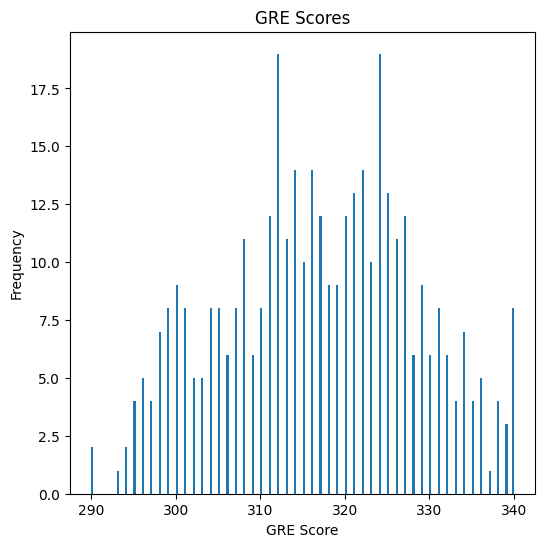

In [ ]:
p = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()


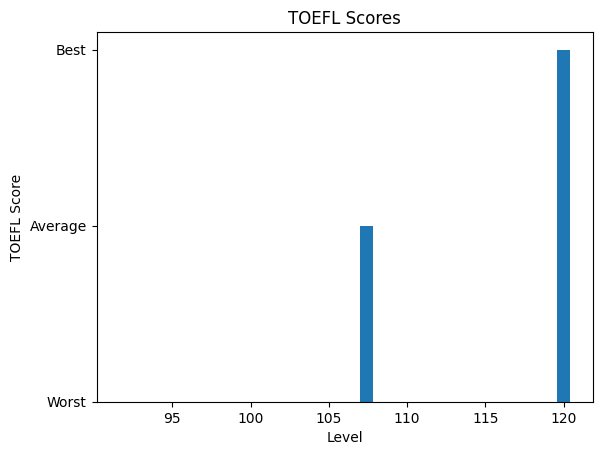

In [ ]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

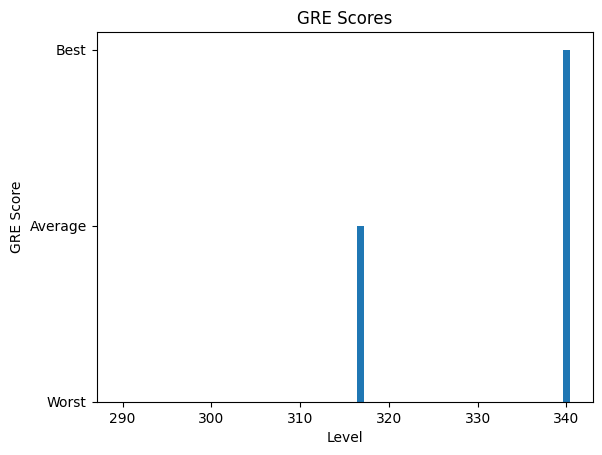

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

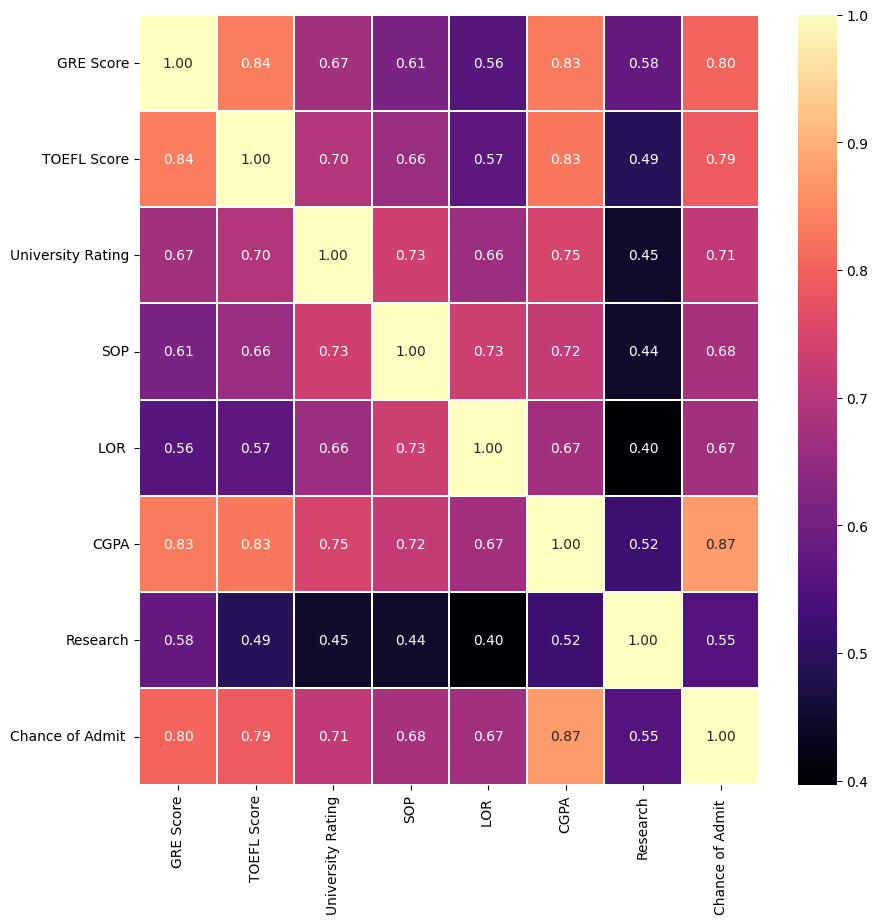

In [ ]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

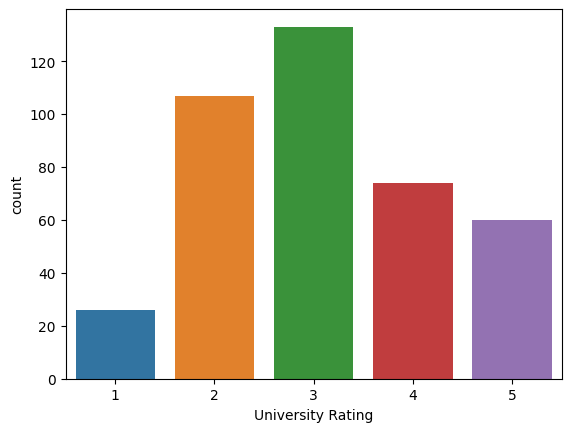

In [ ]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)


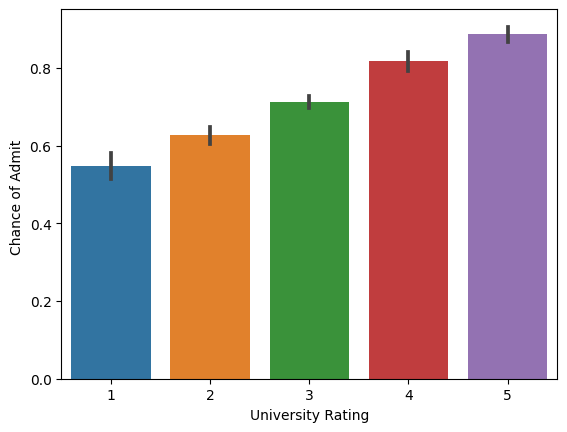

In [ ]:
X=data.drop(['Chance of Admit '],axis=1) #input data_set
y=data['Chance of Admit '] #output labels


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


MODELING AND TRAINING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

In [ ]:
GRE Score	TOEFL Score	University Rating	SOP	LOR	CGPA	Research
133	0.66	0.703704	1.00	0.750	0.875	0.603053	0.0
182	0.18	0.259259	0.25	0.500	0.625	0.259542	0.0
174	0.62	0.666667	0.75	0.750	0.750	0.675573	1.0
292	0.24	0.222222	0.25	0.000	0.250	0.293893	0.0
87	0.54	0.518519	0.25	0.625	0.500	0.412214	0.0

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_train,y_train)


In [ ]:
GradientBoostingRegressor()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
rgr.score(X_test,y_test)

In [ ]:
0.8506105464082431


In [ ]:
y_predict=rgr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04198977717341872
Mean Squared Error: 0.0033348539701851436
Root Mean Squared Error: 0.05774819451883447

In [ ]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [ ]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))


In [ ]:
Accuracy Score: 0.9333333333333333
Recall Score: 1.0
ROC AUC Score: 0.6
Confussion Matrix:
 [[ 1  4]
 [ 0 55]]

SAVING THE MODELS

In [ ]:
# import pickle


In [ ]:
# pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model
# pickle.dump(rgr, open("university_percent.pkl", "wb")) #regression model

HOSTING THE MODEL

In [ ]:
import pickle


In [ ]:
lr = pickle.load(open("university.pkl", "rb")) #logistic regression model
gd = pickle.load(open("university_percent.pkl", "rb")) #regression model

In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "wf8mge_OQdwVO8ao2kmWCtfxOfLWl8442SH44V85v2Ls"
}

client = APIClient(uml_credentials)

In [ ]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    idr = []
    for i in space['resources']:
        idr.append(i['metadata']['id'])
    return idr    
    

In [ ]:
space_uid = guid_from_space_name(client, "IBMprojectmodels")
print(space_uid[0])

In [ ]:
client.set.default_space(space_uid[0])


In [ ]:
'SUCCESS'

In [ ]:
client.software_specifications.list()


In [ ]:
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
kernel-spark3.3-r3.6           1c9e5454-f216-59dd-a20e-474a5cdf5988  base
pytorch-onnx_rt22.1-py3.9-edt  1d362186-7ad5-5b59-8b6c-9d0880bde37f  base
tensorflow_2.1-py3.6           1eb25b84-d6ed-5dde-b6a5-3fbdf1665666  base
spark-mllib_3.2                20047f72-0a98-58c7-9ff5-a77b012eb8f5  base
tensorflow_2.4-py3.8-horovod   217c16f6-178f-56bf-824a-b19f20564c49  base
runtime-22.1-py3.9-cuda        26215f05-08c3-5a41-a1b0-da66306ce658  base
do_py3.8                       295addb5-9ef9-547e-9bf4-92ae3563e720  base
autoai-ts_3.8-py3.8            2aa0c932-798f-5ae9-abd6-15e0c2402fb5  base
tensorflow_1.15-py3.6          2b73a275-7cbf-420b-a912-eae7f436e0bc  base
kernel-spark3.3-py3.9          2b7961e2-e3b1-5a8c-a491-482c8368839a  base
pytorch_1.2-py3.6              2c8ef57d-2687-4b7d-acce-01f94976dac1  base
spark-mllib_2.3                2e51f700-bca0-4b0d-88dc-5c6791338875  base
pytorch-onnx_1.1-py3.6-edt     32983cea-3f32-4400-8965-dde874a8d67e  base
spark-mllib_3.0-py37           36507ebe-8770-55ba-ab2a-eafe787600e9  base
spark-mllib_2.4                390d21f8-e58b-4fac-9c55-d7ceda621326  base
xgboost_0.82-py3.6             39e31acd-5f30-41dc-ae44-60233c80306e  base
pytorch-onnx_1.2-py3.6-edt     40589d0e-7019-4e28-8daa-fb03b6f4fe12  base
default_r36py38                41c247d3-45f8-5a71-b065-8580229facf0  base
autoai-ts_rt22.1-py3.9         4269d26e-07ba-5d40-8f66-2d495b0c71f7  base
autoai-obm_3.0                 42b92e18-d9ab-567f-988a-4240ba1ed5f7  base
pmml-3.0_4.3                   493bcb95-16f1-5bc5-bee8-81b8af80e9c7  base
spark-mllib_2.4-r_3.6          49403dff-92e9-4c87-a3d7-a42d0021c095  base
xgboost_0.90-py3.6             4ff8d6c2-1343-4c18-85e1-689c965304d3  base
pytorch-onnx_1.1-py3.6         50f95b2a-bc16-43bb-bc94-b0bed208c60b  base
autoai-ts_3.9-py3.8            52c57136-80fa-572e-8728-a5e7cbb42cde  base
spark-mllib_2.4-scala_2.11     55a70f99-7320-4be5-9fb9-9edb5a443af5  base
spark-mllib_3.0                5c1b0ca2-4977-5c2e-9439-ffd44ea8ffe9  base
autoai-obm_2.0                 5c2e37fa-80b8-5e77-840f-d912469614ee  base
spss-modeler_18.1              5c3cad7e-507f-4b2a-a9a3-ab53a21dee8b  base
cuda-py3.8                     5d3232bf-c86b-5df4-a2cd-7bb870a1cd4e  base
autoai-kb_3.1-py3.7            632d4b22-10aa-5180-88f0-f52dfb6444d7  base
pytorch-onnx_1.7-py3.8         634d3cdc-b562-5bf9-a2d4-ea90a478456b  base
spark-mllib_2.3-r_3.6          6586b9e3-ccd6-4f92-900f-0f8cb2bd6f0c  base
tensorflow_2.4-py3.7           65e171d7-72d1-55d9-8ebb-f813d620c9bb  base
spss-modeler_18.2              687eddc9-028a-4117-b9dd-e57b36f1efa5  base
-----------------------------  ------------------------------------  ----
Note: Only first 50 records were displayed. To display more use 'limit' parameter.

In [ ]:
software_uid = client.software_specifications.get_uid_by_name('default_py3.7')
print(software_uid)
meta_props={
     client.repository.ModelMetaNames.NAME: "logistic_model",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_uid,
     client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23"
}

In [ ]:
model_details = client.repository.store_model(model=lr, meta_props=meta_props, training_data=None)